# **DIABETES PREDICTION SYSTEM USING MACHINE LEARNING**

In this project, I will be predicting that whether a patient has diabetes or not on the basis of the features I will provide to the machine learning model, and for that, we will be using the famous PIMA Indians Diabetes Database.



Importing the Dependencies.

In [71]:
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import pickle

sns.set()

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_decision_regions
from xgboost import XGBClassifier
from pandas.plotting import scatter_matrix

warnings.filterwarnings('ignore')
%matplotlib inline


Data Collection & Analysis.

About the Dataset

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. The dataset consists of several medical predictor variables and one target variable, **Outcome**. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

Importing the Dataset.

In [56]:
# loading the diabetes dataset to a pandas dataframe for easier analysis

diabetes_dataset = pd.read_csv('/content/diabetes.csv')

In [57]:
# printing the first 5 rows of the dataset

diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Exploratory Data Analysis (EDA)

In [58]:
# number of rows and columns in the dataset

diabetes_dataset.shape

(768, 9)

In [59]:
# getting the statistical measures of the data

diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [60]:
diabetes_dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

0 = Non Diabetic

1 = Diabetic

In [61]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [62]:
# checking if the dataset has null values

diabetes_dataset.isnull().head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


In [63]:
diabetes_dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
diabetes_dataset_copy = diabetes_dataset.copy(deep = True)
diabetes_dataset_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_dataset_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

# Showing the Count of NANs
print(diabetes_dataset_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


**Data Visualization**

Plotting the data distribution before removing null values.

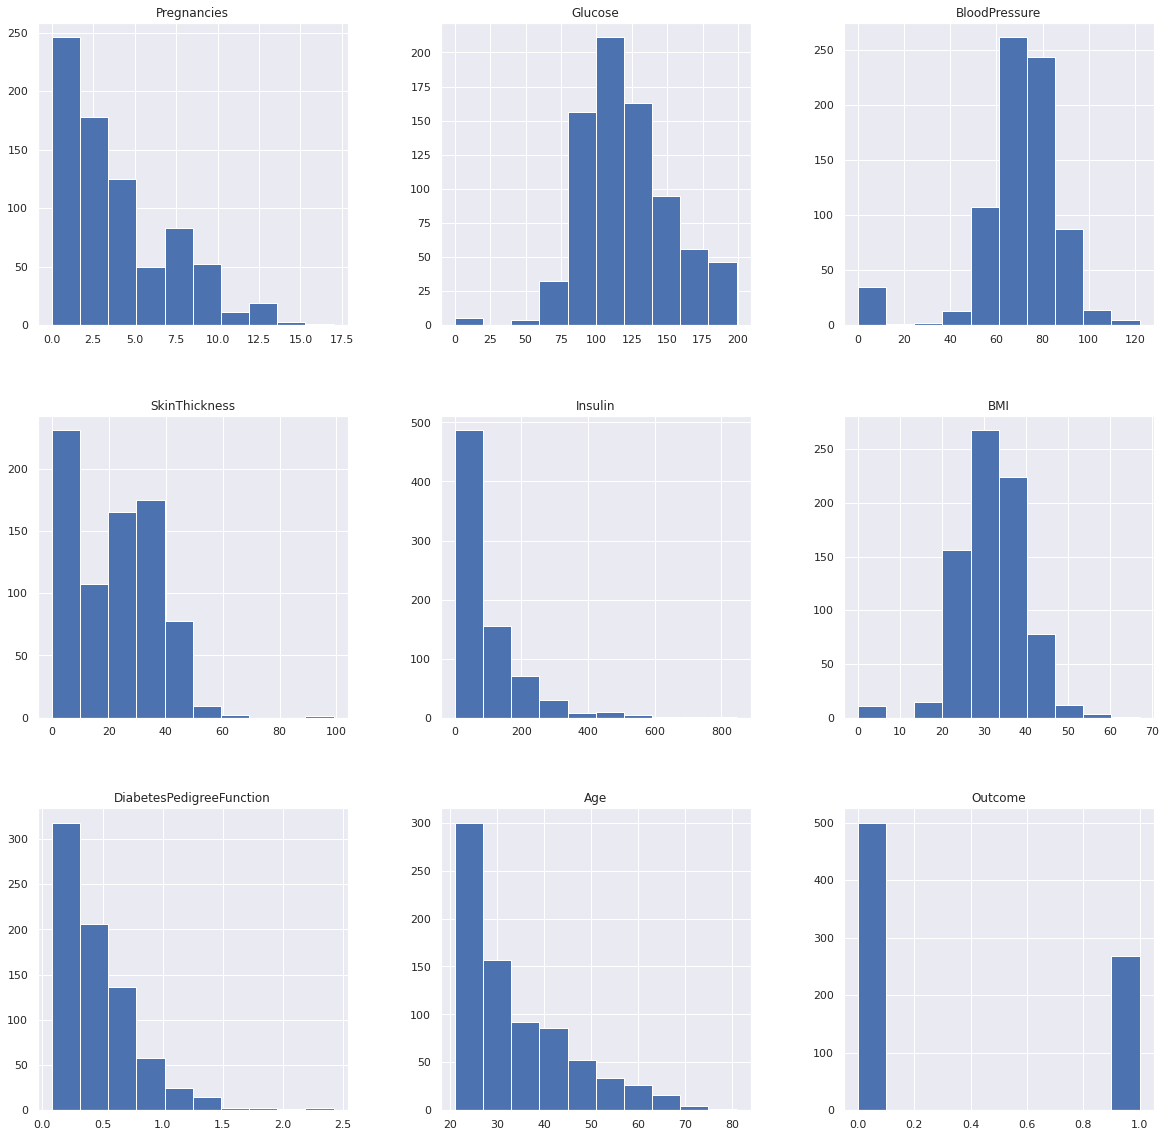

In [ ]:
p = diabetes_dataset.hist(figsize = (20,20))

So here we have seen the distribution of each features whether it is dependent data or independent data and one thing which could always strike that why do we need to see the distribution of data? So the answer is simple it is the best way to start the analysis of the dataset as it shows the occurrence of every kind of value in the graphical structure which in turn lets us know the range of the data.

Now we will be imputing the mean value of the column to each missing value of that particular column.

In [ ]:
diabetes_dataset_copy['Glucose'].fillna(diabetes_dataset_copy['Glucose'].mean(), inplace = True)
diabetes_dataset_copy['BloodPressure'].fillna(diabetes_dataset_copy['BloodPressure'].mean(), inplace = True)
diabetes_dataset_copy['SkinThickness'].fillna(diabetes_dataset_copy['SkinThickness'].median(), inplace = True)
diabetes_dataset_copy['Insulin'].fillna(diabetes_dataset_copy['Insulin'].median(), inplace = True)
diabetes_dataset_copy['BMI'].fillna(diabetes_dataset_copy['BMI'].median(), inplace = True)

Plotting the distribuitions after removing the NAN values.

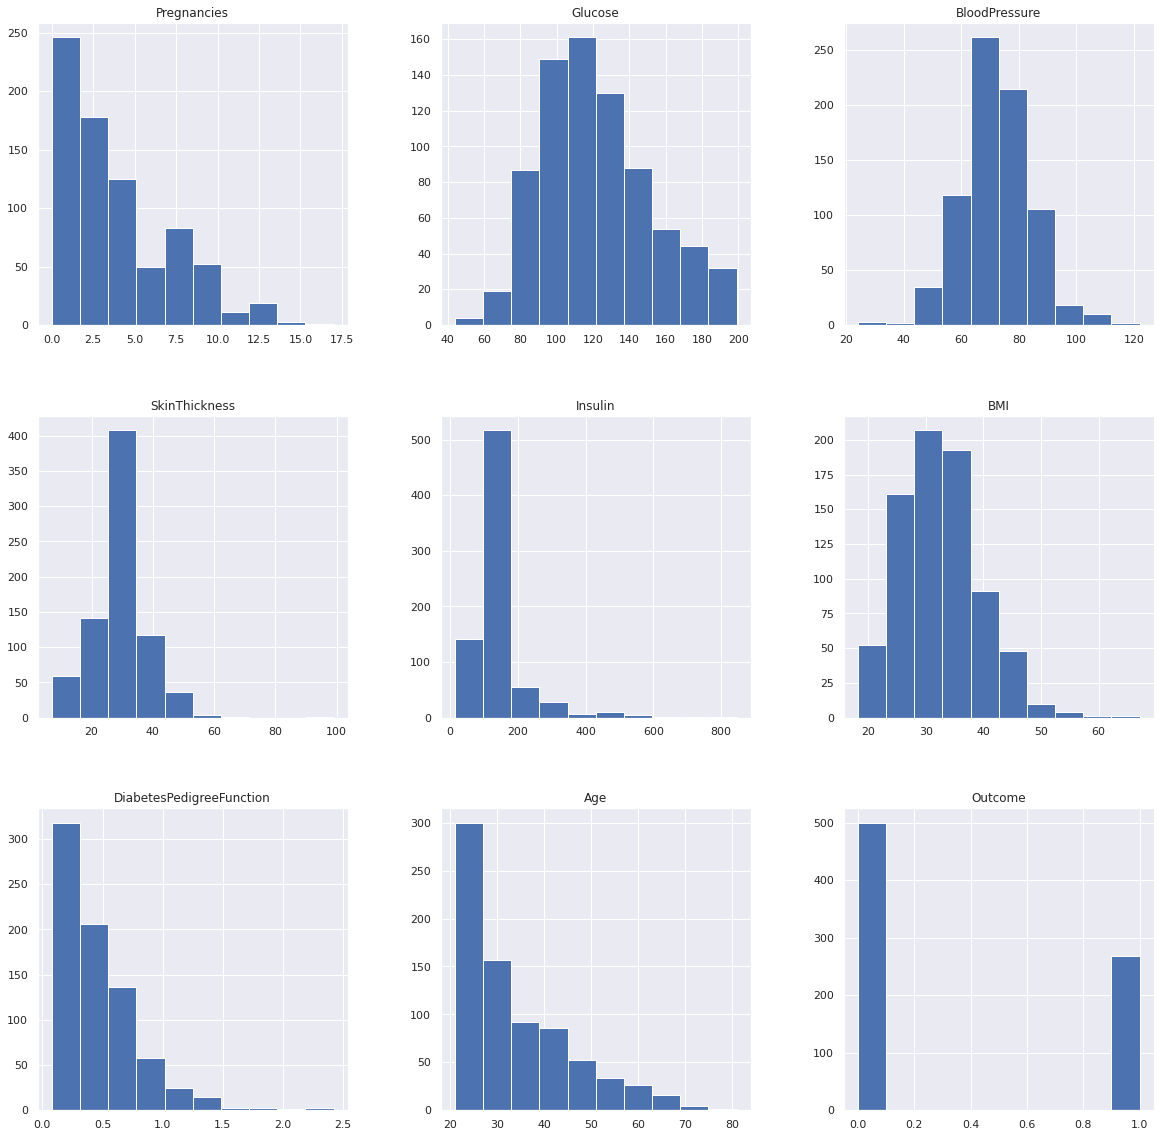

In [ ]:
p = diabetes_dataset_copy.hist(figsize = (20,20))

Here we are again using the hist plot to see the distribution of the dataset but this time we are using this visualization to see the changes that we can see after those null values are removed from the dataset and we can clearly see the difference for example – In age column after removal of the null values, we can see that there is a spike at the range of 50 to 100 which is quite logical as well.

Plotting Null Count Analysis Plot.

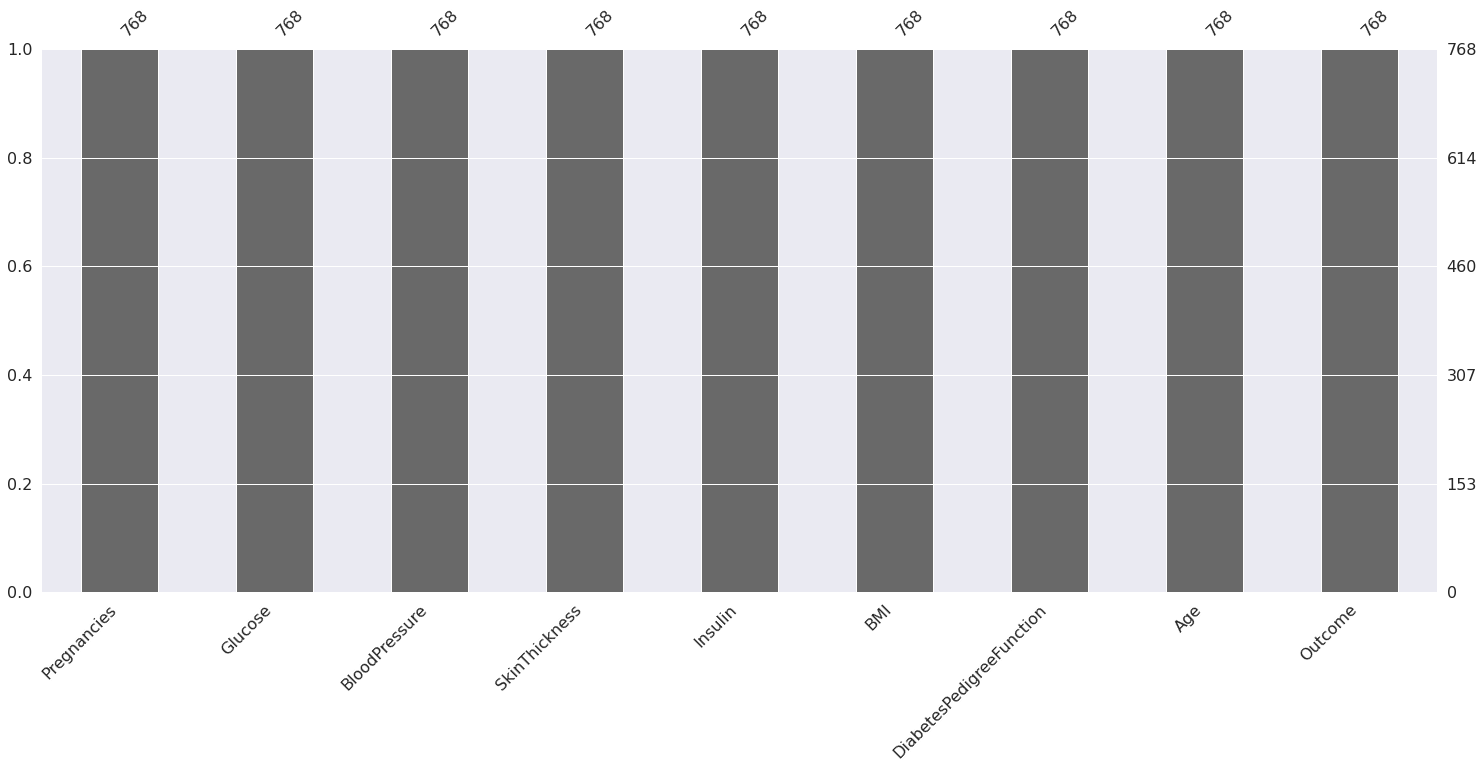

In [ ]:
p = msno.bar(diabetes_dataset)

Now in the above graph also we can clearly see that there are no null values in the dataset.

Now, let’s check that how well the outcome column is balanced

0    500
1    268
Name: Outcome, dtype: int64


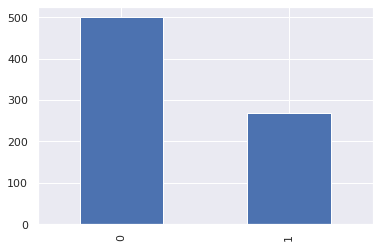

In [ ]:
color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = diabetes_dataset["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(diabetes_dataset.Outcome.value_counts())
p=diabetes_dataset.Outcome.value_counts().plot(kind="bar")

from the above visualization it is clearly visible that our dataset is completely imbalanced in fact the number of patients who are diabetic is half of the patients who are non-diabetic.

**Correlation between all the features.**

Correlation between all the features before cleaning

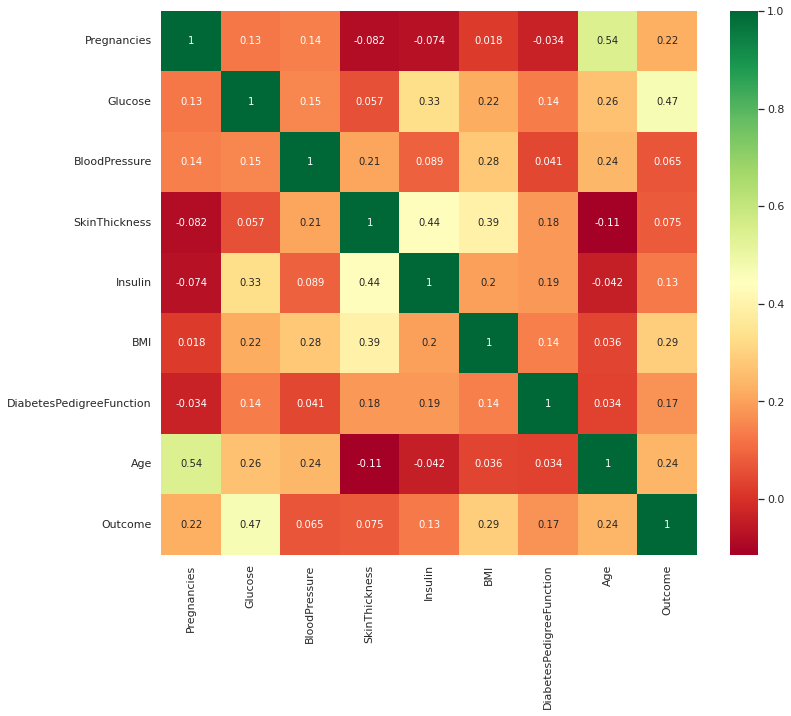

In [ ]:
plt.figure(figsize=(12,10))
# seaborn has an easy method to showcase heatmap
p = sns.heatmap(diabetes_dataset.corr(), annot=True,cmap ='RdYlGn')

**Scaling the Data**

In [ ]:
diabetes_dataset_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


After Standard Scaling:

In [ ]:
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(diabetes_dataset_copy.drop(["Outcome"],axis = 1),), columns=['Pregnancies', 
'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])

X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


**Building the Model**

Splitting the dataset:

In [ ]:
X = diabetes_dataset.drop('Outcome', axis = 1)
y = diabetes_dataset['Outcome']

Now we will split the data into training and testing data using the train_test_split function

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, stratify=y, random_state=4)

**SVM**

Building the model using SVM

In [ ]:
classifier = svm.SVC(kernel = 'linear')

In [ ]:
classifier.fit(X_train, y_train)

SVC(kernel='linear')

Now after building the model let's check the accuracy of the model on the training dataset and calculate the accuracy score.

In [ ]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [ ]:
print('Accuracy score on the training data : ', training_data_accuracy)

Accuracy score on the training data :  0.7879377431906615


In [ ]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)


In [ ]:
print('Accuracy score on the test data : ', test_data_accuracy)

Accuracy score on the test data :  0.7480314960629921


Classification report and confusion matrix of the SVM classifier

In [ ]:
print(confusion_matrix(y_test, X_test_prediction))
print(classification_report(y_test, X_test_prediction))

[[134  31]
 [ 33  56]]
              precision    recall  f1-score   support

           0       0.80      0.81      0.81       165
           1       0.64      0.63      0.64        89

    accuracy                           0.75       254
   macro avg       0.72      0.72      0.72       254
weighted avg       0.75      0.75      0.75       254



**Random Forest**

Building the model using RandomForest

In [ ]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

Now after building the model let’s check the accuracy of the model on the training dataset.

In [ ]:
# accuracy score on training data
rfc_train = rfc.predict(X_train)
print("Accuracy_Score =", format(metrics.accuracy_score(y_train, rfc_train)))

Accuracy_Score = 1.0


So here we can see that on the training dataset our model is overfitted.

In [ ]:
# accuracy score on test data
predictions = rfc.predict(X_test)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))

Accuracy_Score = 0.7244094488188977


Classification report and confusion matrix of the random forest model

In [ ]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[126  39]
 [ 31  58]]
              precision    recall  f1-score   support

           0       0.80      0.76      0.78       165
           1       0.60      0.65      0.62        89

    accuracy                           0.72       254
   macro avg       0.70      0.71      0.70       254
weighted avg       0.73      0.72      0.73       254



**Decision Tree**

Building the model using DecisionTree

In [ ]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# accuracy score on training data
predictions = dtree.predict(X_train)
print("Accuracy Score =", format(metrics.accuracy_score(y_train,predictions)))

Accuracy Score = 1.0


In [64]:
# accuracy score on test data
predictions = dtree.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test,predictions)))

Accuracy Score = 0.6732283464566929


Classification report and confusion matrix of the decision tree model

In [65]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[116  49]
 [ 34  55]]
              precision    recall  f1-score   support

           0       0.77      0.70      0.74       165
           1       0.53      0.62      0.57        89

    accuracy                           0.67       254
   macro avg       0.65      0.66      0.65       254
weighted avg       0.69      0.67      0.68       254



**XgBoost Classifier**

Building the model using XGBoost

In [67]:
xgb_model = XGBClassifier(gamma=0)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [68]:
# accuracy on test data
xgb_pred = xgb_model.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test, xgb_pred)))

Accuracy Score = 0.7007874015748031


Classification report and confusion matrix of the XgBoost classifier

In [69]:
print(confusion_matrix(y_test, xgb_pred))
print(classification_report(y_test, xgb_pred))

[[118  47]
 [ 29  60]]
              precision    recall  f1-score   support

           0       0.80      0.72      0.76       165
           1       0.56      0.67      0.61        89

    accuracy                           0.70       254
   macro avg       0.68      0.69      0.68       254
weighted avg       0.72      0.70      0.71       254



**The Conclusion from Model Building**

Therefore SVM is the best model for this prediction since it has an accuracy_score of 0.74.

**Saving the SVM Model**

Saving the model using pickle

In [72]:
# Firstly we will be using the dump() function to save the model using pickle
saved_model = pickle.dumps(classifier)

In [73]:
# Then we will be loading that saved model
classifier_from_pickle = pickle.loads(saved_model)

In [74]:
# lastly, after loading that model we will use this to make predictions
classifier_from_pickle.predict(X_test)

array([0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0])

Now for the last time, I’ll be looking at the head and tail of the dataset so that we can take any random set of features from both the head and tail of the data to test that if our model is good enough to give the right prediction.

In [75]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [76]:
diabetes_dataset.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


Putting data points in the model will either return 0 or 1 i.e. person suffering from diabetes or not.

In [84]:
first_prediction = classifier.predict([[0,137,40,35,168,43.1,2.228,33]]) #4th patient
if (first_prediction == 0):
   print('No the patient is not diabetic :', first_prediction)
else:
   print('Yes the patient is diabetic :', first_prediction)

Yes the patient is diabetic : [1]


In [85]:
second_prediction = classifier.predict([[10,101,76,48,180,32.9,0.171,63]])  # 763rd patient
if (second_prediction == 0):
   print('No the patient is not diabetic :', second_prediction)
else:
   print('Yes the patient is diabetic :', second_prediction)


No the patient is not diabetic : [0]


**Conclusion**

After using all these patient records, we are able to build a machine learning model (SVM – best one) to accurately predict whether or not the patients in the dataset have diabetes or not along with that we were able to draw some insights from the data via data analysis and visualization.